In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn import metrics
from nltk.cluster import KMeansClusterer,cosine_distance,euclidean_distance
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import mixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
import nltk
import re
import random
import emoji
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import chardet
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize, pos_tag
nltk.download ('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
dataset = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Misinfodata_Twitter.csv")
dataset

,Date,Text
0,2022/3/24 19:02,Those blood pressure medications have had deca...
1,2022/3/24 19:02,Kettering Health doctor works to build trust t...
2,2022/3/24 19:02,NOW is the time to get boosted. Household memb...
3,2022/3/24 19:02,"Watch Dudu Sher-Arami, Director of Public Heal..."
4,2022/3/24 19:02,In partnership with the Cayuga County Health D...
...,...,...
57761,2022/3/16 14:20,WTO DG Okonjo-Iweala Welcomes Breakthrough On ...
57762,2022/3/16 14:20,Here's why you might need a fourth COVID #vacc...
57763,2022/3/16 14:20,Theres a vaccine clinic open today for kids ag...
57764,2022/3/16 14:19,Global powers inch closer to agreement to waiv...


In [5]:
dataset = dataset.dropna()
dataset

,Date,Text
0,2022/3/24 19:02,Those blood pressure medications have had deca...
1,2022/3/24 19:02,Kettering Health doctor works to build trust t...
2,2022/3/24 19:02,NOW is the time to get boosted. Household memb...
3,2022/3/24 19:02,"Watch Dudu Sher-Arami, Director of Public Heal..."
4,2022/3/24 19:02,In partnership with the Cayuga County Health D...
...,...,...
57761,2022/3/16 14:20,WTO DG Okonjo-Iweala Welcomes Breakthrough On ...
57762,2022/3/16 14:20,Here's why you might need a fourth COVID #vacc...
57763,2022/3/16 14:20,Theres a vaccine clinic open today for kids ag...
57764,2022/3/16 14:19,Global powers inch closer to agreement to waiv...


In [6]:
dataset1 = dataset[0:3000]
dataset1

,Date,Text
0,2022/3/24 19:02,Those blood pressure medications have had deca...
1,2022/3/24 19:02,Kettering Health doctor works to build trust t...
2,2022/3/24 19:02,NOW is the time to get boosted. Household memb...
3,2022/3/24 19:02,"Watch Dudu Sher-Arami, Director of Public Heal..."
4,2022/3/24 19:02,In partnership with the Cayuga County Health D...
...,...,...
2998,2022/3/24 12:22,"Why is Miralax, a laxative, in the Covid- vacc..."
2999,2022/3/24 12:22,ICYMI: Florida Republican Rep. Byron Donalds j...
3000,2022/3/24 12:22,"file this under ""shit ive been saying since "" ..."
3001,2022/3/24 12:22,In the #News at : AM Moderna now has $ billio...


In [7]:
df2 = dataset1[dataset1.isnull().values==True] # 查找所有带NaN值的数据
print(df2)

Empty DataFrame
Columns: [Date, Text]
Index: []


In [8]:
Text = dataset1['Text']
Text

0       Those blood pressure medications have had deca...
1       Kettering Health doctor works to build trust t...
2       NOW is the time to get boosted. Household memb...
3       Watch Dudu Sher-Arami, Director of Public Heal...
4       In partnership with the Cayuga County Health D...
                              ...                        
2998    Why is Miralax, a laxative, in the Covid- vacc...
2999    ICYMI: Florida Republican Rep. Byron Donalds j...
3000    file this under "shit ive been saying since " ...
3001    In the #News at : AM  Moderna now has $ billio...
3002    Injection objection: Dr Guy Hatchard discusses...
Name: Text, Length: 3000, dtype: object

In [9]:
df = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/all_tweet.csv")
df

,is_misinfo,text content
0,0,uhg time to get my second vaccine i hope i don...
1,1,New censorship! Twitter says it may be mislead...
2,1,"If you’ve had a COVID- vaccine, it’s thanks in..."
3,0,Got my second vaccine. Can't wait to still wea...
4,0,Post-second vaccine symptoms description: like...
...,...,...
12746,0,yay mak getting vaccine todayy
12747,0,I had the incredible privilege of receiving th...
12748,0,Got my first dose of vaccine \n#vaccinated #...
12749,1,We still have no long term evidence of impact ...


In [10]:
df['number'] = 0
df

,is_misinfo,text content,number
0,0,uhg time to get my second vaccine i hope i don...,0
1,1,New censorship! Twitter says it may be mislead...,0
2,1,"If you’ve had a COVID- vaccine, it’s thanks in...",0
3,0,Got my second vaccine. Can't wait to still wea...,0
4,0,Post-second vaccine symptoms description: like...,0
...,...,...,...
12746,0,yay mak getting vaccine todayy,0
12747,0,I had the incredible privilege of receiving th...,0
12748,0,Got my first dose of vaccine \n#vaccinated #...,0
12749,1,We still have no long term evidence of impact ...,0


In [11]:
for i in range(len(df)):
    df.iloc[i,2] = i

In [12]:
df

,is_misinfo,text content,number
0,0,uhg time to get my second vaccine i hope i don...,0
1,1,New censorship! Twitter says it may be mislead...,1
2,1,"If you’ve had a COVID- vaccine, it’s thanks in...",2
3,0,Got my second vaccine. Can't wait to still wea...,3
4,0,Post-second vaccine symptoms description: like...,4
...,...,...,...
12746,0,yay mak getting vaccine todayy,12746
12747,0,I had the incredible privilege of receiving th...,12747
12748,0,Got my first dose of vaccine \n#vaccinated #...,12748
12749,1,We still have no long term evidence of impact ...,12749


In [13]:
from collections import Counter
freq_count = []
for item in df['text content']:
    count = Counter(str(item).split())
    freq_count.append(count)
df['word_count'] = freq_count
df.head()

,is_misinfo,text content,number,word_count
0,0,uhg time to get my second vaccine i hope i don...,0,"{'uhg': 2, 'time': 1, 'to': 2, 'get': 1, 'my':..."
1,1,New censorship! Twitter says it may be mislead...,1,"{'New': 1, 'censorship!': 1, 'Twitter': 1, 'sa..."
2,1,"If you’ve had a COVID- vaccine, it’s thanks in...",2,"{'If': 1, 'you’ve': 1, 'had': 1, 'a': 1, 'COVI..."
3,0,Got my second vaccine. Can't wait to still wea...,3,"{'Got': 1, 'my': 1, 'second': 1, 'vaccine.': 1..."
4,0,Post-second vaccine symptoms description: like...,4,"{'Post-second': 1, 'vaccine': 1, 'symptoms': 1..."


In [14]:
import string
string.punctuation
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join =''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def preprocess_text(text):
    text = remove_numbers(text)
    text = remove_http(text)
    text = remove_punctuation(text)
    text = convert_to_lower(text)
    text = remove_white_space(text)
    text = remove_short_words(text)
    tokens = toknizing(text)
    # 2. POS tagging
    pos_map = {'J': 'a', 'N': 'n', 'R': 'r', 'V': 'v'}
    pos_tags_list = pos_tag(tokens)
    # print(pos_tags)
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(w.lower(), 
                                   pos=pos_map.get(p[0], 'v')) 
              for w, p in pos_tags_list]
    return tokens
def convert_to_lower(text):
    return text.lower()
def remove_numbers(text):
    text = re.sub(r'\d+' , '', text)
    return text
def remove_http(text):
    text = re.sub("https?:\/\/t.co\/[A-Za-z0-9]*", ' ', text)
    return text
def remove_short_words(text):
    text = re.sub(r'\b\w{1,2}\b', '', text)
    return text
def remove_punctuation(text):
    punctuations = '''!()[]{};«№»:'"\,`<>./?@=#$-(%^)+&[*_]~'''
    no_punct = ""
     
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct
def remove_white_space(text):
    text = text.strip()
    return text
def toknizing(text):
#     stp = my_stopwords
#     stops = set(stopwords.words('english'))
    stop_words = set('english')
    tokens = word_tokenize(text)
    result = [i for i in tokens if not i in stop_words]
    return result

In [16]:
df['text content'] = df['text content'].apply(preprocess_text)

In [17]:
df

,is_misinfo,text content,number,word_count
0,0,"[uhg, time, get, second, vaccine, hope, don, ’...",0,"{'uhg': 2, 'time': 1, 'to': 2, 'get': 1, 'my':..."
1,1,"[new, censorship, twitter, say, may, mislead, ...",1,"{'New': 1, 'censorship!': 1, 'Twitter': 1, 'sa..."
2,1,"[you, ’, have, covid, vaccine, ’, thanks, part...",2,"{'If': 1, 'you’ve': 1, 'had': 1, 'a': 1, 'COVI..."
3,0,"[get, second, vaccine, cant, wait, still, wear...",3,"{'Got': 1, 'my': 1, 'second': 1, 'vaccine.': 1..."
4,0,"[postsecond, vaccine, symptom, description, li...",4,"{'Post-second': 1, 'vaccine': 1, 'symptoms': 1..."
...,...,...,...,...
12746,0,"[yay, mak, get, vaccine, todayy]",12746,"{'yay': 1, 'mak': 1, 'getting': 1, 'vaccine': ..."
12747,0,"[have, the, incredible, privilege, receive, th...",12747,"{'I': 1, 'had': 1, 'the': 2, 'incredible': 1, ..."
12748,0,"[get, first, dose, vaccine, vaccinate, nftartist]",12748,"{'Got': 1, 'my': 1, 'first': 1, 'dose': 1, 'of..."
12749,1,"[still, have, long, term, evidence, impact, th...",12749,"{'We': 1, 'still': 1, 'have': 1, 'no': 1, 'lon..."


In [18]:
D = df
for i in range(len(D)):
    D.iloc[i,1] = ','.join(str(i) for i in D.iloc[i,1])


In [19]:
D

,is_misinfo,text content,number,word_count
0,0,"uhg,time,get,second,vaccine,hope,don,’,die,lik...",0,"{'uhg': 2, 'time': 1, 'to': 2, 'get': 1, 'my':..."
1,1,"new,censorship,twitter,say,may,mislead,say,’,g...",1,"{'New': 1, 'censorship!': 1, 'Twitter': 1, 'sa..."
2,1,"you,’,have,covid,vaccine,’,thanks,part,cell,ge...",2,"{'If': 1, 'you’ve': 1, 'had': 1, 'a': 1, 'COVI..."
3,0,"get,second,vaccine,cant,wait,still,wear,mask,o...",3,"{'Got': 1, 'my': 1, 'second': 1, 'vaccine.': 1..."
4,0,"postsecond,vaccine,symptom,description,like,mi...",4,"{'Post-second': 1, 'vaccine': 1, 'symptoms': 1..."
...,...,...,...,...
12746,0,"yay,mak,get,vaccine,todayy",12746,"{'yay': 1, 'mak': 1, 'getting': 1, 'vaccine': ..."
12747,0,"have,the,incredible,privilege,receive,the,covi...",12747,"{'I': 1, 'had': 1, 'the': 2, 'incredible': 1, ..."
12748,0,"get,first,dose,vaccine,vaccinate,nftartist",12748,"{'Got': 1, 'my': 1, 'first': 1, 'dose': 1, 'of..."
12749,1,"still,have,long,term,evidence,impact,the,vacci...",12749,"{'We': 1, 'still': 1, 'have': 1, 'no': 1, 'lon..."


# TF-IDF

In [20]:
tfidfVect = TfidfVectorizer()
tfidf = tfidfVect.fit_transform(D['text content'])
tfidf

<12751x12829 sparse matrix of type '<class 'numpy.float64'>'
	with 154131 stored elements in Compressed Sparse Row format>

In [21]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(D['text content'])

In [312]:
print(features)

  (0, 2770)	0.14179374575665918
  (0, 319)	0.12859172498138122
  (0, 665)	0.2045500033157487
  (0, 2185)	0.20617641532694586
  (0, 4007)	0.13981637490027957
  (0, 438)	0.08002347881845082
  (0, 350)	0.2700643797663524
  (0, 1013)	0.240513695118134
  (0, 10169)	0.2215573772479058
  (0, 12258)	0.15779321463704787
  (0, 6417)	0.29370678671830786
  (0, 3029)	0.17305037472945925
  (0, 3214)	0.2342178131917412
  (0, 5156)	0.187970139092867
  (0, 11918)	0.04188420417564251
  (0, 9828)	0.1134904246418098
  (0, 4495)	0.07062349562694857
  (0, 11255)	0.16105359844854272
  (0, 11609)	0.6295456794469041
  (1, 12424)	0.18022435601497222
  (1, 9609)	0.2436103870467039
  (1, 990)	0.11921889798587346
  (1, 11129)	0.1652611624178064
  (1, 4450)	0.16331157055933745
  (1, 7061)	0.3824657737633571
  :	:
  (12749, 6519)	0.26149380189277466
  (12749, 8307)	0.29067163422040737
  (12749, 11216)	0.27304081538626673
  (12749, 11891)	0.17065013467485352
  (12749, 7644)	0.15577672887751123
  (12749, 11076)	0.0745

# KNN

In [22]:
features_train, features_test, labels_train, labels_test = train_test_split(features, D['is_misinfo'],test_size=0.3, random_state=42)

In [46]:
pred_scores = []
for i in range(1,20):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(features_train, labels_train)
    pred = knc.predict(features_test)
    pred_scores.append(accuracy_score(labels_test,pred))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

[0.871144798745426, 0.8421327757449033, 0.8753267119707266, 0.8593831677992682, 0.8842132775744903, 0.8740198640878202, 0.8899634082592787, 0.8761108207004704, 0.8923157344485102, 0.8771562990067956, 0.8878724516466283, 0.8784631468897021, 0.8894406691061161, 0.8815995818086775, 0.8878724516466283, 0.8795086251960271, 0.8849973863042342, 0.880292733925771, 0.8852587558808155]


<AxesSubplot:>

0.8923157344485102
8


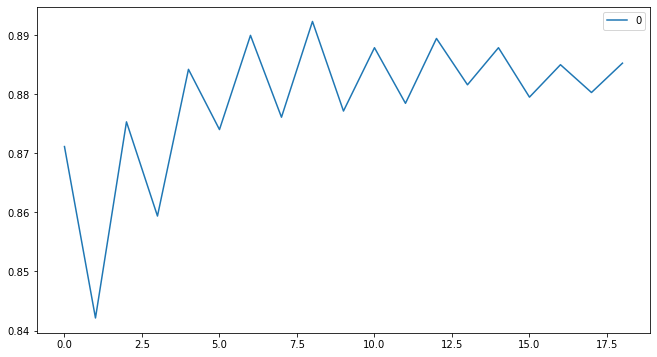

In [54]:
print (pred_scores)

array = np.array(pred_scores, dtype = int)
DF = pd.DataFrame()
for i in range(len(pred_scores)):
    DF.loc[i,0] = pred_scores[i]
# DF['K Values'] = [1,2,3,4,5,6,7,8,9,10,11]
# DF['Score']= [0.871144798745426,0.8421327757449033,0.8753267119707266,0.8593831677992682,0.8842132775744903,0.8842132775744903,0.8899634082592787,0.8761108207004704,0.8923157344485102,0.8771562990067956,0.8878724516466283]
# plt.xlabel("Value of K")
# plt.ylabel("predict score")
# x = [i for i in pred_scores.keys()]
# y = [i for i in pred_scores.values()]
# # print(x)
# # print(y)
# plt.plot(x, y, label="loss")
# plt.legend()
DF.plot(figsize=(11,6))
a = 0
b = 0
for i in range(len(DF)):
  if   DF.iloc[i,0] > a:
    a = DF.iloc[i,0]
    b = i
print (a)
print (b)
# DF.plot(x = 'K Values', y = 'Score'] )
# plt.ylim([0.9, 1])
# plt.show()

In [207]:
# DF['k values'] = 0
# for i in range(len(DF)):
#     DF.iloc[i,1] = i+1
# DF

,Score,k values
0,0.871145,1
1,0.842133,2
2,0.875327,3
3,0.859383,4
4,0.884213,5
5,0.884213,6
6,0.889963,7
7,0.876111,8
8,0.892316,9
9,0.877156,10


In [55]:
modelGetNew = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
modelGetNew.fit(features_train, labels_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [60]:
Text_final = dataset1.drop(columns = 'Date', axis = 1)

In [64]:
Text_final['Text'] = Text_final['Text'].apply(preprocess_text)

In [71]:
a = {"a": Text_clean}
Text_final = pd.DataFrame(a)
Text_final1 = ','.join(str(i) for i in Text_final)

for i in range(len(Text_final)):
    Text_final.iloc[i,0] = ','.join(str(i) for i in Text_final.iloc[i,0])
# array = np.asarray(Text_clean[0])
# array

Text_final=Text_final.replace('\,',' ',regex=True)
Text_final

,a
0,those blood pressure medication have have deca...
1,kettering health doctor work build trust close...
2,now the time get boost household member covid ...
3,watch dudu sherarami director public health en...
4,partnership with the cayuga county health depa...
...,...
2998,why miralax laxative the covid vaccine have sp...
2999,icymi florida republican rep byron donalds joi...
3000,file this under shit ive be say since hence th...
3001,the news moderna now have billion sign deal fo...


In [72]:
Text_final['Label'] = 0
# Text_final = Text_final.drop(['Lable'],axis = 1)
Text_final

,a,Label
0,those blood pressure medication have have deca...,0
1,kettering health doctor work build trust close...,0
2,now the time get boost household member covid ...,0
3,watch dudu sherarami director public health en...,0
4,partnership with the cayuga county health depa...,0
...,...,...
2998,why miralax laxative the covid vaccine have sp...,0
2999,icymi florida republican rep byron donalds joi...,0
3000,file this under shit ive be say since hence th...,0
3001,the news moderna now have billion sign deal fo...,0


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
for i in range(len(Text_final)):
 newData = Text_final.iloc[i,0]
 newData = [newData]
 count_vect = CountVectorizer()
 newDataTFIDF = vectorizer.transform(newData)
 newDataClass=modelGetNew.predict(newDataTFIDF)
#  printable={'Text':newData,'label':newDataClass}
 Text_final.iloc[i,1] = newDataClass
#  for title, predicted in zip(newData,newDataClass):
#         print(f'{title} => {predicted}') 

In [74]:
Text_final

# D1 = df

# D1=D1.replace('\’','',regex=True)
# D1=D1.replace("\,",' ',regex=True)
# D1
# D1.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Last.csv",index = False)

,a,Label
0,those blood pressure medication have have deca...,0
1,kettering health doctor work build trust close...,0
2,now the time get boost household member covid ...,0
3,watch dudu sherarami director public health en...,1
4,partnership with the cayuga county health depa...,0
...,...,...
2998,why miralax laxative the covid vaccine have sp...,0
2999,icymi florida republican rep byron donalds joi...,0
3000,file this under shit ive be say since hence th...,1
3001,the news moderna now have billion sign deal fo...,0


In [259]:
# for i in range(len(D1)):
#     D1.iloc[i,1]

0       those blood pressure medication have have deca...
1       kettering health doctor work build trust close...
2       now the time get boost household member covid ...
3       watch dudu sherarami director public health en...
4       partnership with the cayuga county health depa...
                              ...                        
2998    why miralax laxative the covid vaccine have sp...
2999    icymi florida republican rep byron donalds joi...
3000    file this under shit ive be say since hence th...
3001    the news moderna now have billion sign deal fo...
3002    injection objection guy hatchard discuss polis...
Name: a, Length: 3000, dtype: object

In [212]:
D1.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Last.csv",index = False)

In [76]:
Text_final

,a,Label
0,those blood pressure medication have have deca...,0
1,kettering health doctor work build trust close...,0
2,now the time get boost household member covid ...,0
3,watch dudu sherarami director public health en...,1
4,partnership with the cayuga county health depa...,0
...,...,...
2998,why miralax laxative the covid vaccine have sp...,0
2999,icymi florida republican rep byron donalds joi...,0
3000,file this under shit ive be say since hence th...,1
3001,the news moderna now have billion sign deal fo...,0


In [77]:
from collections import Counter
from numpy import nan
a = Counter(Text_final['Label'] == 1)
a

Counter({False: 2183, True: 817})

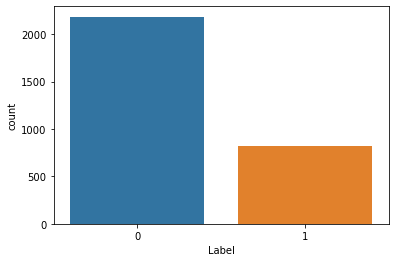

In [78]:
import seaborn as sns
ax = sns.countplot(x='Label', data=Text_final)

In [298]:
len(D1)
len(Text_final)
Text_final.rename(columns={'a':'text content', 'Label':'is_misinfo'}, inplace = True)

12751

3000

In [299]:
FINAL = pd.concat([D1, Text_final])
FINAL

,is_misinfo,text content
0,0,uhg time to get my second vaccine i hope i don...
1,1,New censorship! Twitter says it may be mislead...
2,1,If youve had a COVID- vaccine its thanks in p...
3,0,Got my second vaccine. Can't wait to still wea...
4,0,Post-second vaccine symptoms description: like...
...,...,...
2998,0,why miralax laxative the covid vaccine have sp...
2999,0,icymi florida republican rep byron donalds joi...
3000,1,file this under shit ive be say since hence th...
3001,0,the news moderna now have billion sign deal fo...


In [285]:
x_train = D1['text content']
x_test = D1['is_misinfo']
y_train = Text_final['a']
y_test = Text_final['Label']

In [300]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer_train = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(FINAL['text content']).toarray()


In [301]:
x = tweets_countvectorizer_train
y = FINAL['is_misinfo']


In [302]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

# Model Comparison

In [304]:

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [306]:
from sklearn.metrics import classification_report, confusion_matrix

In [308]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
print("Naive Bayes:\n ",classification_report(y_test, y_predict_test))

Naive Bayes:
                precision    recall  f1-score   support

           0       0.93      0.94      0.93      2089
           1       0.87      0.86      0.86      1062

    accuracy                           0.91      3151
   macro avg       0.90      0.90      0.90      3151
weighted avg       0.91      0.91      0.91      3151



In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# def cluster_kmean(train_text, test_text, test_label):
from sklearn.model_selection import train_test_split
classfier = LogisticRegression()

classfier.fit(x_train, y_train)   
y_predict_test = classfier.predict(x_test)
cm = confusion_matrix(y_test, classfier.predict(x_test))
print(classification_report(y_test, classfier.predict(x_test)))

LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2089
           1       0.92      0.82      0.87      1062

    accuracy                           0.91      3151
   macro avg       0.92      0.89      0.90      3151
weighted avg       0.92      0.91      0.91      3151



In [311]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
cm = confusion_matrix(y_test, XGB.predict(x_test))
print("xgboost: \n ",classification_report(y_test, XGB.predict(x_test)))

C:\Users\Kelvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgboost: 
                precision    recall  f1-score   support

           0       0.88      0.96      0.92      2089
           1       0.91      0.74      0.82      1062

    accuracy                           0.89      3151
   macro avg       0.89      0.85      0.87      3151
weighted avg       0.89      0.89      0.88      3151



In [77]:
f = dataset1.iloc[0,1]
f

"Those blood pressure medications have had decades of studys.  Wait for the Covid vaccine recalls I '"

In [173]:
Text_final

,a
0,those blood pressure medication have have deca...
1,kettering health doctor work build trust close...
2,now the time get boost household member covid ...
3,watch dudu sherarami director public health en...
4,partnership with the cayuga county health depa...
...,...
2998,why miralax laxative the covid vaccine have sp...
2999,icymi florida republican rep byron donalds joi...
3000,file this under shit ive be say since hence th...
3001,the news moderna now have billion sign deal fo...


In [42]:
# import string
# string.punctuation
# def message_cleaning(message):
#     Test_punc_removed = [char for char in message if char not in string.punctuation]
#     Test_punc_removed_join =''.join(Test_punc_removed)
#     Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
#     return Test_punc_removed_join_clean

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [124]:
# dataset1_text = [str (item) for item in dataset1['Text']]
A0 = Text_final.iloc[0,0]
A0 = [A0]
A0_tfidfVect = TfidfVectorizer()
A0_tfidfVect = A0_tfidfVect.fit(A0)
A0_tfidf = A0_tfidfVect.transform(Text_final['a'])
A0_tfidf

<3000x13 sparse matrix of type '<class 'numpy.float64'>'
	with 6516 stored elements in Compressed Sparse Row format>

In [107]:
A0_tfidfVect.vocabulary_
A0_tfidf_table = pd.DataFrame(sorted(A0_tfidfVect.vocabulary_.items(),key=lambda pair: pair[1],reverse=True))
A0_tfidf_table

{'those': 10,
 'blood': 0,
 'pressure': 6,
 'medication': 5,
 'have': 4,
 'decade': 2,
 'studys': 8,
 'wait': 12,
 'for': 3,
 'the': 9,
 'covid': 1,
 'vaccine': 11,
 'recall': 7}

,0,1
0,wait,12
1,vaccine,11
2,those,10
3,the,9
4,studys,8
5,recall,7
6,pressure,6
7,medication,5
8,have,4
9,for,3


In [102]:
# def message_cleaning(message):
#     Test_punc_removed = [char for char in message if char not in string.punctuation]
#     Test_punc_removed_join = ''.join(Test_punc_removed)
#     Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
#     return Test_punc_removed_join_clean

In [2]:
tweets_data = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Last.csv")

In [3]:
tweets_data

,is_misinfo,text content,number
0,0,uhg time get second vaccine hope don ’ die lik...,0
1,1,new censorship twitter say may mislead say ’ g...,1
2,1,you ’ have covid vaccine ’ thanks part cell ge...,2
3,0,get second vaccine cant wait still wear mask o...,3
4,0,postsecond vaccine symptom description like mi...,4
...,...,...,...
12746,0,yay mak get vaccine todayy,12746
12747,0,have the incredible privilege receive the covi...,12747
12748,0,get first dose vaccine vaccinate nftartist,12748
12749,1,still have long term evidence impact the vacci...,12749


# Test Data Accuracy

In [79]:
Text_final

,a,Label
0,those blood pressure medication have have deca...,0
1,kettering health doctor work build trust close...,0
2,now the time get boost household member covid ...,0
3,watch dudu sherarami director public health en...,1
4,partnership with the cayuga county health depa...,0
...,...,...
2998,why miralax laxative the covid vaccine have sp...,0
2999,icymi florida republican rep byron donalds joi...,0
3000,file this under shit ive be say since hence th...,1
3001,the news moderna now have billion sign deal fo...,0


In [80]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer_train = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(Text_final['a']).toarray()

In [81]:
x = tweets_countvectorizer_train
y = Text_final['Label']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
print("Naive Bayes:\n ",classification_report(y_test, y_predict_test))

MultinomialNB()

Naive Bayes:
                precision    recall  f1-score   support

           0       0.83      0.89      0.86       425
           1       0.68      0.57      0.62       175

    accuracy                           0.80       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.79      0.80      0.79       600



In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# def cluster_kmean(train_text, test_text, test_label):
from sklearn.model_selection import train_test_split
classfier = LogisticRegression()

classfier.fit(x_train, y_train)   
y_predict_test = classfier.predict(x_test)
cm = confusion_matrix(y_test, classfier.predict(x_test))
print(classification_report(y_test, classfier.predict(x_test)))

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       425
           1       0.77      0.46      0.58       175

    accuracy                           0.80       600
   macro avg       0.79      0.70      0.73       600
weighted avg       0.80      0.80      0.79       600



In [85]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
cm = confusion_matrix(y_test, XGB.predict(x_test))
print("xgboost: \n ",classification_report(y_test, XGB.predict(x_test)))

C:\Users\Kelvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgboost: 
                precision    recall  f1-score   support

           0       0.81      0.95      0.88       425
           1       0.79      0.46      0.58       175

    accuracy                           0.81       600
   macro avg       0.80      0.71      0.73       600
weighted avg       0.81      0.81      0.79       600



In [99]:
def cluster_kmean(train_text, test_text, test_label):
    
    tfidf_vect = TfidfVectorizer(min_df=4,  stop_words='english' ,max_df = 1.0)
    dtm = tfidf_vect.fit_transform(train_text)
    num_clusters = 4
    clusterer = KMeansClusterer(num_clusters, cosine_distance, repeats=20)
    clusters = clusterer.cluster(dtm.toarray(), assign_clusters=True)
    test_dtm = tfidf_vect.transform(test_text)
    predicted = [clusterer.classify(v) for v in test_dtm.toarray()]
    confusion_df = pd.DataFrame(list(zip(test_label, predicted)), columns = ["label", "cluster"])
    df = pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    labels = dict(df.idxmax(axis = 1))
    predicted_target = [labels[i]  for i in predicted]
    print("Cosine Distance:\n ",metrics.classification_report(test_label.values, predicted_target))
    centroids=np.array(clusterer.means())
    sorted_centroids = centroids.argsort()[:, ::-1] 
    voc_lookup= tfidf_vect.get_feature_names()

    for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
      top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
      print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

In [100]:
Text_final

,a,Label
0,those blood pressure medication have have deca...,0
1,kettering health doctor work build trust close...,0
2,now the time get boost household member covid ...,0
3,watch dudu sherarami director public health en...,1
4,partnership with the cayuga county health depa...,0
...,...,...
2998,why miralax laxative the covid vaccine have sp...,0
2999,icymi florida republican rep byron donalds joi...,0
3000,file this under shit ive be say since hence th...,1
3001,the news moderna now have billion sign deal fo...,0


In [101]:
df_train, df_test = train_test_split(Text_final,test_size = 0.2)
train_text = df_train["a"]
test_label = df_test["Label"]
test_text = df_test["a"]

In [102]:
cluster_kmean(train_text, test_text, test_label)

C:\Users\Kelvin\anaconda3\lib\site-packages\nltk\cluster\util.py:130: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


Cosine Distance:
                precision    recall  f1-score   support

           0       0.78      0.97      0.87       448
           1       0.70      0.21      0.32       152

    accuracy                           0.78       600
   macro avg       0.74      0.59      0.59       600
weighted avg       0.76      0.78      0.73       600

Cluster 0:
 vaccine; covid; know; death; just; like; work; dont; booster; die; vaccinate; amp; clinic; make; think; effect; need; cause; health; doesnt 
Cluster 1:
 people; vaccine; covid; say; dose; age; year; child; moderna; million; group; lakh; old; youngster; inoculate; administer; dos; fourth; india; need 
Cluster 2:
 mandate; new; athlete; city; performer; york; lift; vaccine; covid; mayor; adam; nyc; exempt; rich; eric; country; poor; pro; end; level 
Cluster 3:
 moderna; fda; kid; shot; ask; pfizer; month; approve; young; plan; application; pause; covid; ceo; vaccine; flexibility; soon; child; eligibility; authorization 


C:\Users\Kelvin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
Model = ['K-means', 'Naive Bayes', 'Logistic Regression', 'Xgboost', 'BERT']
accuracy= [0.78, 0.80, 0.80, 0.81, 0.84 ]

<Figure size 864x288 with 0 Axes>

(0.7, 0.85)

<AxesSubplot:>

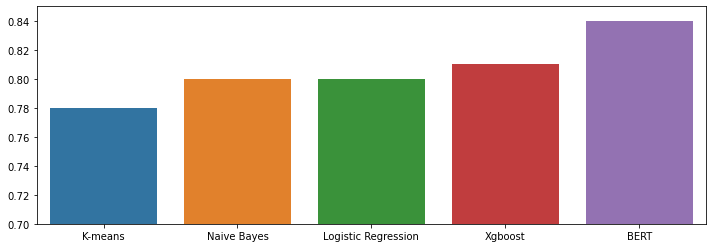

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(12,4));
plt.ylim([0.7, 0.85]);
sns.barplot(x = Model, y = accuracy)

In [112]:
df = Text_final
df.sort_values(by="Label" , inplace=True, ascending=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       3000 non-null   object
 1   Label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


,a,Label
0,those blood pressure medication have have deca...,0
750,sorry for this inconvenience shipments novavax...,0
751,delhi central government arrange covid bed all...,0
205,omg what exactly do the war ukraine have with ...,0
204,guess who else get covid tff take test tuesday...,0
...,...,...
1737,sweden and denmark suspend use moderna covid v...,1
879,data show that vaccine more effective than ini...,1
1735,its,1
1702,trusted messenger can improve covid vaccine he...,1
